<span style="font-size:20px;">**Extract YouTube Comments**</span>

In [1]:
#install necessary packages
%pip install textblob
%pip install --force-reinstall google-api-python-client

Note: you may need to restart the kernel to use updated packages.
  Using cached google_api_python_client-2.95.0-py2.py3-none-any.whl (11.5 MB)
  Using cached google_auth-2.22.0-py2.py3-none-any.whl (181 kB)
  Using cached httplib2-0.22.0-py3-none-any.whl (96 kB)
  Using cached google_api_core-2.11.1-py3-none-any.whl (120 kB)
  Using cached google_auth_httplib2-0.1.0-py2.py3-none-any.whl (9.3 kB)
  Using cached uritemplate-4.1.1-py2.py3-none-any.whl (10 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached googleapis_common_protos-1.60.0-py2.py3-none-any.whl (227 kB)
  Using cached protobuf-4.23.4-cp37-abi3-macosx_10_9_universal2.whl (400 kB)
  Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached pyasn1_modules-0.3.0-py2.py3-none-any.whl (181 kB)
  Using cached urllib3-1.26.16-py2.py3-none-any.whl (143 kB)
  Using cached pyparsing-3.1.1-py3-none-

In [2]:
#import libraries and packages
import googleapiclient.discovery
import googleapiclient.errors
from textblob import TextBlob
import csv
import os
import re

#authentication
api_service_name = "youtube"
api_version = "v3"
youtube_api_key = "insert api key here"

In [3]:
#uncomment to access api

#api = googleapiclient.discovery.build(api_service_name, api_version, developerKey=youtube_api_key)

In [4]:
# request comments from desired YouTube video
channel = "insert channel name here"
id = "insert video id here"

In [5]:
#uncomment below to request comments

#request = api.commentThreads().list(part="snippet", videoId=id, maxResults=1000)
#response = request.execute()

In [6]:
#uncomment below to add comments to list

#comments = []
#for item in response['items']:
#    comments.append(item['snippet']['topLevelComment']['snippet']['textDisplay'])

<span style="font-size:20px;">**Sentiment Analysis**</span>

In [7]:
#function to clean comments
def clean_comment(comment):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", comment).split())

#function to append comment sentiments to csv file
def append_list_to_csv(comments, filename):
    file_exists = os.path.isfile(filename)
    with open(filename, 'a', newline='') as csv_file:
        writer = csv.writer(csv_file)
        if not file_exists:
            writer.writerow(['Comment', 'Polarity', 'Subjectivity', 'Channel'])  # write header only if the file is newly created
        for comment in comments:
            text = clean_comment(comment)
            analysis = TextBlob(text)
            polarity = analysis.polarity
            subjectivity = analysis.subjectivity
            writer.writerow([text, polarity, subjectivity, channel])
    print("Done!")

In [8]:
#uncomment below to add scrape comments and append to csv file

#append_list_to_csv(comments, 'sentiments.csv')

<span style="font-size:20px;">**Sentiment Data Visualization**</span>

In [9]:
#import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read comments CSV to dataframe
df = pd.read_csv('/Users/arjunchadha/Desktop/Folder 8/dev/youtube-bot-sentiment-analysis/sentiments.csv')

df.head(5)

,Comment,Polarity,Subjectivity,Channel
0,Why are you reacting to a 9 month old event tho,0.10,0.20,Guardian News
1,praying they have to serve actual jail time,-0.05,0.05,Guardian News
2,They re way outta wack,0.00,0.00,Guardian News
3,What does this do to stop oil and how is this ...,0.00,0.00,Guardian News
4,What in the GCSE drama,0.00,0.00,Guardian News


In [10]:
#categorize comments by polarity 

conditions = [
    df['Polarity'] < 0,
    df['Polarity'] > 0,
    df['Polarity'] == 0
]

sentiment_labels = ['Negative', 'Positive', 'Neutral']

df['Sentiment'] = pd.Series(
    np.select(conditions, sentiment_labels, default='Undefined'),
    index=df.index
)

sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Neutral     620
Positive    468
Negative    437
Name: Sentiment, dtype: int64

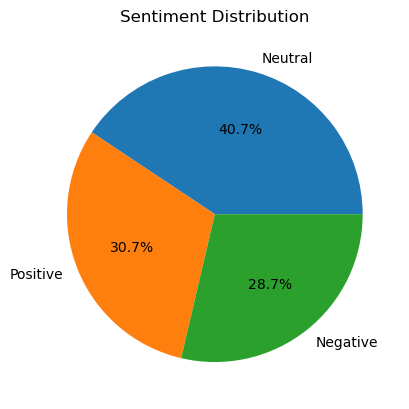

In [11]:
#visualize sentiment distribution

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')

plt.show()

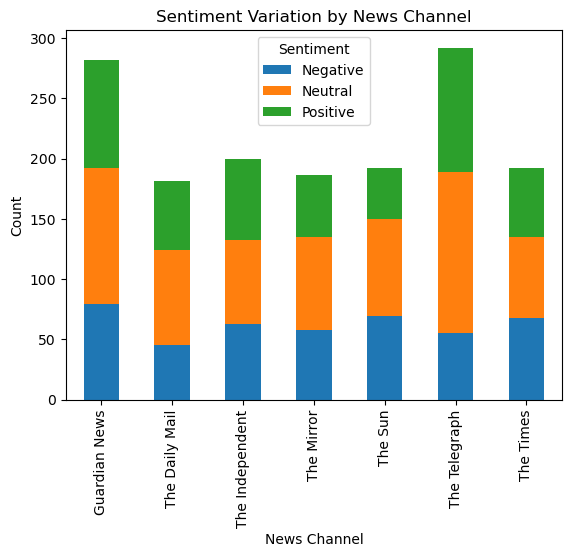

In [12]:
# stacked bar graph of sentiments by channel 
sentiment_counts = df.groupby(['Channel', 'Sentiment']).size().unstack()

sentiment_counts.plot(kind='bar', stacked=True)

plt.xlabel('News Channel')
plt.ylabel('Count')
plt.title('Sentiment Variation by News Channel')

plt.show()

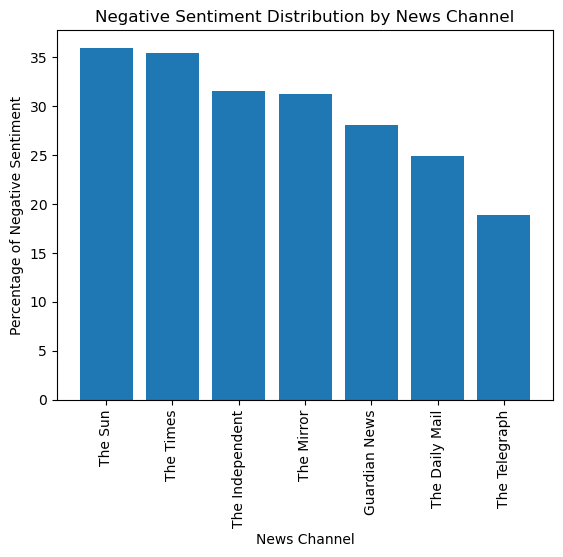

In [13]:
# histogram of negative sentiment by channel
sentiment_percentage = df.groupby('Channel')['Sentiment'].apply(lambda x: (x == 'Negative').mean() * 100)

sentiment_percentage = sentiment_percentage.sort_values(ascending=False)

plt.bar(sentiment_percentage.index, sentiment_percentage)

plt.xlabel('News Channel')
plt.ylabel('Percentage of Negative Sentiment')
plt.title('Negative Sentiment Distribution by News Channel')

plt.xticks(rotation=90)

plt.show()

Average Subjectivity Score: 0.3470173527596039


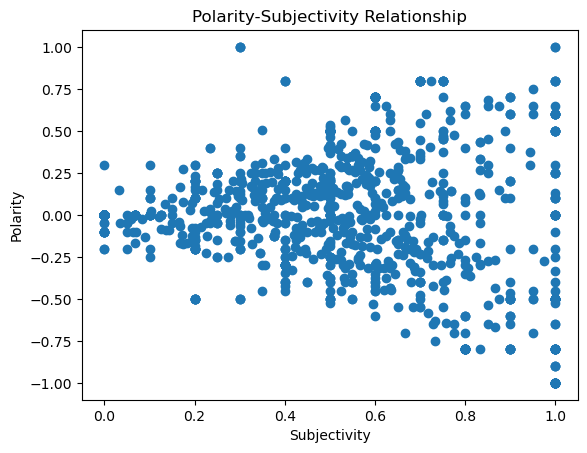

In [14]:
# Subjectivity Analysis
average_subjectivity = df['Subjectivity'].mean()
print("Average Subjectivity Score:", average_subjectivity)

# Polarity-Subjectivity Relationship
plt.scatter(df['Subjectivity'], df['Polarity'])
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.title('Polarity-Subjectivity Relationship')

plt.show()